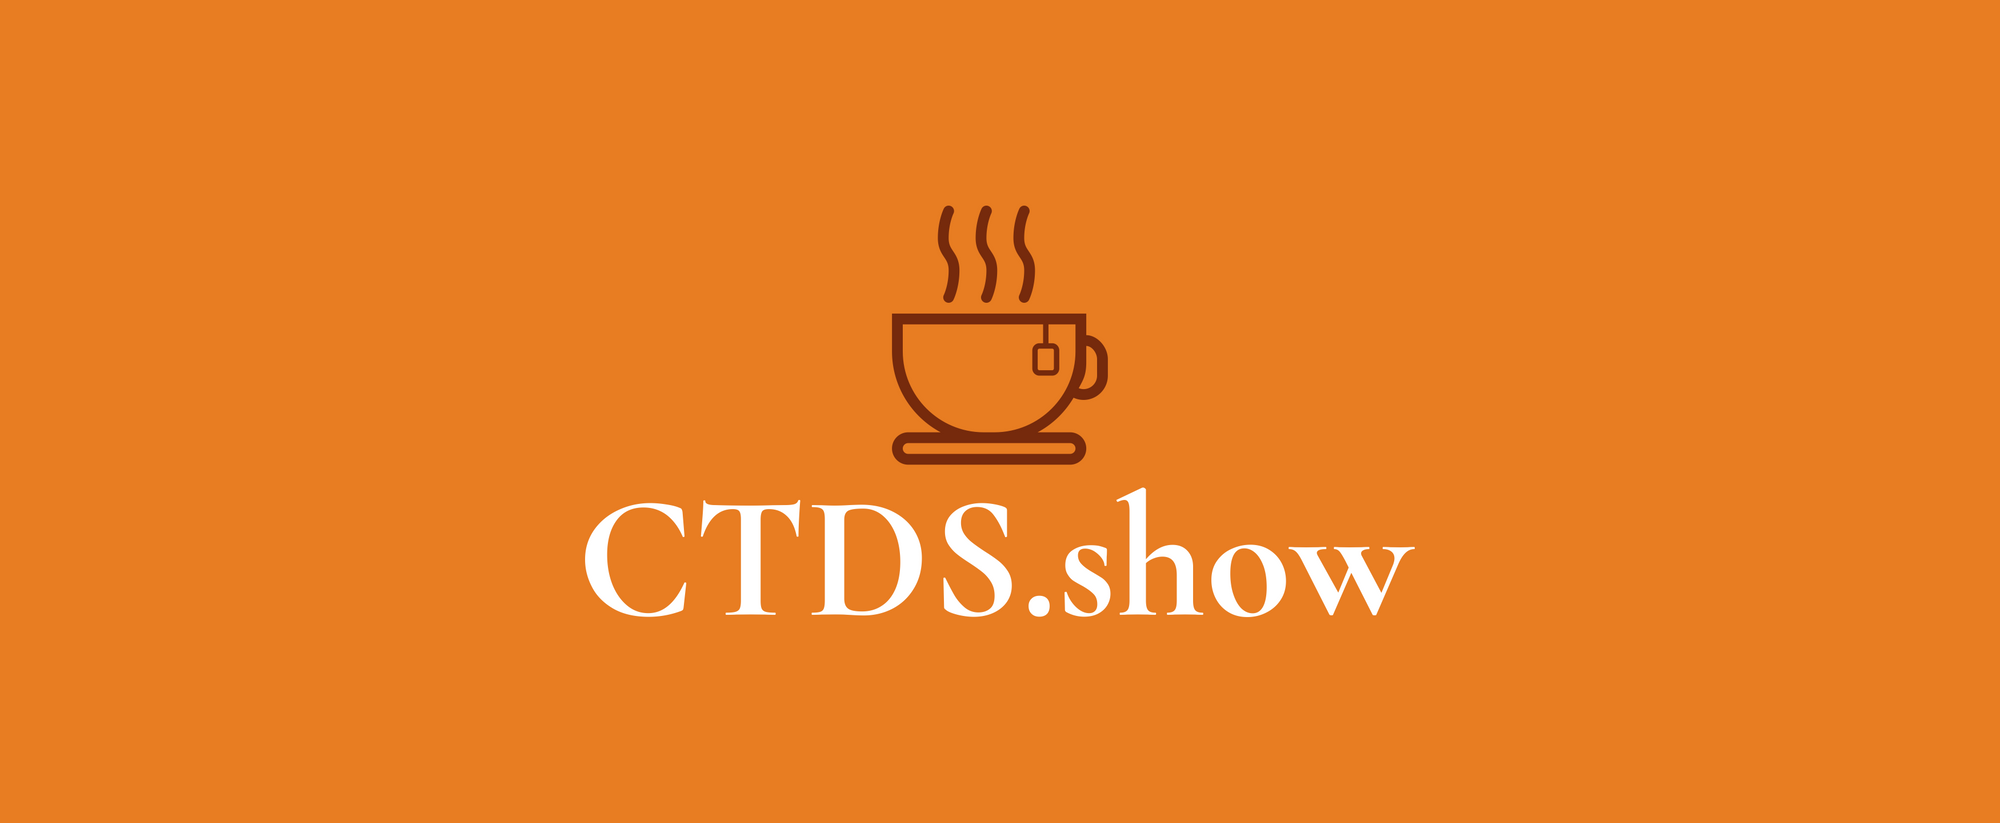

# Interviews with Kagglers, Researchers and Data Science Practitioners 


[Youtube Link](https://www.youtube.com/channel/UCRjtBP-o5FbgRzX2BHQEFtQ)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/chai-time-data-science"))

# Load some essential packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams
rcParams["figure.figsize"] = 16,8
import plotly.graph_objects as go
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Load Episodes data
episode = pd.read_csv("/kaggle/input/chai-time-data-science/Episodes.csv")
pd.set_option('display.max_columns', 50)

In [ ]:
# First 5 row of data
episode.head()

# Chai Time Data Science Show -- Sanyam Bhutani.

In [ ]:
# Load image for wordcluoud
mask = np.array(Image.open("/kaggle/input/imagedata/teavup.jpg"))

In [ ]:
print("Welcome to Chai Time Data Science Show with Sanyam Bhutani.")

stopwords = set(STOPWORDS)
text = " ".join(review for review in episode["episode_name"])

wc = WordCloud(stopwords=stopwords, mask=mask, max_words=2000, max_font_size=70,colormap="Set2",
              random_state=42, width=mask.shape[1], height=mask.shape[0], background_color='#151515')
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Interview with kaggler, ML Engineer, Data Scientist
# Talk about Data Science, Lesson etc.

In [ ]:
# Some information of Data
episode.info()

In [ ]:
anchor = pd.read_csv("/kaggle/input/chai-time-data-science/Anchor Thumbnail Types.csv")

In [ ]:
description = pd.read_csv("/kaggle/input/chai-time-data-science/Description.csv")

In [ ]:
description["description"][0]

In [ ]:
def clean_data(name):
    # Replace email addresses with 'email'
    processed = name.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')
    
    
    # Replace URLs with 'webaddress'
    processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    processed = processed.str.replace(r'£|\$', 'moneysymb')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumbr')
    
    processed = processed.str.replace(r'^\[.*?\]', " ")
    # Replace numbers with 'numbr'
    processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    processed = processed.str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    processed = processed.str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    processed = processed.str.replace(r'^\s+|\s+?$', '')

    # change words to lower case - Hello, HELLO, hello are all the same word
    processed = processed.str.lower()
    
    return processed

In [ ]:
clean_data = clean_data(description["description"])

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

clean_data = clean_data.apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

In [ ]:
ep_des = clean_data
text_desc = " ".join(des for des in ep_des)

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["webaddress", "https", "http", "numbr", "liqwyd", "bhutanisanyamnumbr"])

def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)


wordcloud = WordCloud(width = 1500, height = 1000, random_state=42, 
                      background_color='white', color_func=random_color_func, collocations=False, stopwords = stopwords, min_font_size=25).generate(text_desc)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Description of Episode", fontweight="bold")
plt.axis("off")
plt.show()

In [ ]:
# anchor.head()

In [ ]:
# Shape of Data
episode.shape

## Count of male and female in several episodes

In [ ]:
hero = episode["heroes_gender"].value_counts()
print(f"Count of episode hero \n{hero}")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))

    return "{:.1f}%\n({:d})".format(pct, absolute)
wedges, texts, autotexts = ax.pie(hero, autopct=lambda pct: func(pct, hero),
                                  textprops=dict(color="w"), colors=["#1b3945", "#666666"])
ax.legend(hero.index,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Count of gender")

## Heros Location

In [ ]:
country = episode["heroes_location"].value_counts()

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))
# ax.style.use("Solarize_Light2")
country_list = [c for c in country.index]

wedges, texts = ax.pie(country, wedgeprops=dict(width=0.5), startangle=40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(country_list[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Heros Location", fontweight="bold")
print(f"Heros location \n{country}")

In [ ]:
fig = px.choropleth(episode,locations="heroes_location",locationmode="country names",hover_name="heroes",title="ML heores Location in several recording date", color="recording_date")
fig.show()

## Heroes Nationality 

In [ ]:
nationality = episode["heroes_nationality"].value_counts()

sns.set_style("whitegrid")

plt.style.use("bmh")

fig, ax = plt.subplots(figsize=(10, 8))
labels = episode.heroes_nationality.value_counts().index
values = episode.heroes_nationality.value_counts().values
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct="%.0f%%")
ax.legend(nationality.index,
          title="Country",
          loc="center right",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")
autotexts[0].set_color('white')
ax.set_title("Count of Nationality")

In [ ]:
fig = px.choropleth(episode,locations="heroes_nationality",locationmode="country names",hover_name="heroes",title="ML heores Nationality")
fig.show()

# Male and female in different work platform

In [ ]:
sns.countplot(episode["heroes_gender"], hue=episode["category"], palette="Set2")

# Less researcher, most of the male heroes are kaggler

# Kaggle Heroes Username

In [ ]:
episode["heroes_kaggle_username"] = episode["heroes_kaggle_username"].fillna("Unknown")
hero_name = episode.heroes_kaggle_username
text_name_kag = " ".join(name for name in hero_name)
stopwords.update(["Unknown"])


wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords).generate(text_name_kag)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Kaggle Username Of Our Heroes", fontweight="bold")
plt.axis("off")
plt.show()

# Twitter Handle Of Heroes

In [ ]:
episode["heroes_twitter_handle"] = episode["heroes_twitter_handle"].fillna("Unknown")
twitter_name = episode.heroes_twitter_handle

text_name_twitte = " ".join(name for name in twitter_name)


wine_mask = np.array(Image.open("/kaggle/input/imagedata/twitter.png"))
wine_mask[wine_mask <= 0] = 255

wc = WordCloud(background_color="white", max_words=1000, width=300, height=300,max_font_size=250, mask=wine_mask,
                contour_width=3, contour_color='firebrick', stopwords=stopwords)

# Generate a wordcloud
wc.generate(text_name_twitte)

# show
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation='bilinear')
plt.title("Twitter Handle Of Our Heroes", fontweight="bold")
plt.axis("off")
plt.show()

# Episode Duration of different episodes

In [ ]:
fig = px.line(episode, x="episode_id", y="episode_duration", title='Episode Duration')
fig.show()

# episode view, watch hour, avarage watch hour

In [ ]:
youtube = episode[["episode_id", "heroes", "youtube_views", "youtube_watch_hours", "youtube_avg_watch_duration"]]

In [ ]:
df_comb=pd.melt(youtube, id_vars=['episode_id'], value_vars=['youtube_views', 'youtube_watch_hours', 'youtube_avg_watch_duration'])

px.line(df_comb, x="episode_id", y="value", color='variable', title="episode id vs youtube view, watch hour, avg watch duration")

## episode 27 got high view, high watch hour

In [ ]:
a = youtube[youtube["episode_id"]=="E27"]
name = list(a["heroes"].values)
listToStr = ' '.join([str(elem) for elem in name])
print(f"Name of hero1 got high view: {listToStr}")

b = youtube[youtube["episode_id"]=="E49"]
name1 = list(b["heroes"].values)
listToStr1 = ' '.join([str(elem) for elem in name1])
print(f"Name of hero2 got high view: {listToStr1}")

# Like, Dislike, Comments

In [ ]:
likeDislike = episode[["episode_id", "youtube_likes", "youtube_dislikes", "youtube_comments"]]

In [ ]:
df_comb=pd.melt(likeDislike, id_vars=['episode_id'], value_vars=['youtube_likes', 'youtube_dislikes', 'youtube_comments'])
px.line(df_comb, x="episode_id", y="value", color='variable', title="episode id vs like, dislike, comments")

# Episode 27 got 183 likes and 16 comments and Name of hero: Jeremy Howard

# Episode Id And Channel Subscriber

In [ ]:
heroVssubs = episode[["episode_id", "youtube_subscribers"]]
# heroVssubs.plot(figsize=(12,6))
fig = px.line(heroVssubs, x="episode_id", y="youtube_subscribers", title='Episode Id Vs Channel Subscriber')
fig.show()

# heroes who helped to grow channels

In [ ]:
herosSubs = episode[["heroes", "youtube_subscribers"]].sort_values("youtube_subscribers", ascending=False)[:20]
herosSubs

In [ ]:
fig = px.bar(herosSubs, x="heroes", y="youtube_subscribers", color="youtube_subscribers", title="Heros helped to grow channel")
fig.show()

# Youtube Subscribe in special episodes

In [ ]:
episodeNohero = episode[episode["heroes"].isnull()]
fig = px.bar(episodeNohero, x="episode_id", y="youtube_subscribers", color="youtube_subscribers", title="Chai Time Data Science Show by Sanyam Bhutani (Special Episodes)")
fig.show()

# Some details of special episode

In [ ]:
def make_str(val, ep_id):
    ep = episodeNohero[episodeNohero["episode_id"]==ep_id]
    a = list(ep[val].values)
    listToStr = ' '.join([str(elem) for elem in a])
    return listToStr

b = make_str("episode_name", "E69")
c = make_str("episode_id", "E69")
d = make_str("youtube_subscribers", "E69")
print(f"Episode Name: {b} \nEpisode Id: {c} \nYoutube Subscriber: {d}")

# Impression View and nonimpression views

In [ ]:
impressVsnon = episode[["episode_id", "youtube_impression_views", "youtube_nonimpression_views"]]
imp_non=pd.melt(impressVsnon, id_vars=['episode_id'], value_vars=['youtube_impression_views', 'youtube_nonimpression_views'])
px.line(imp_non, x="episode_id", y="value", color='variable')

# By other platform show listener

In [ ]:
listener = episode[["episode_id", "spotify_listeners", "apple_listeners"]]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=listener["episode_id"],
    y=listener["spotify_listeners"],
    name='spotify',
    marker_color='lightslategrey'
))
fig.add_trace(go.Bar(
    x=listener["episode_id"],
    y=listener["apple_listeners"],
    name='apple',
    marker_color='crimson'
))

fig.update_layout(
    title='Listener from apple and spotify',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count of listener',
        titlefont_size=16,
        tickfont_size=14
    )
)

# There are a lot of spotify user
# Listener from different platform are decreaseing day by day
# CTDS.show has to hold on spotify market...to reach more

In [ ]:
apple = episode[["episode_id", "apple_listened_hours", "apple_avg_listen_duration"]]
apple_avg=pd.melt(apple, id_vars=['episode_id'], value_vars=['apple_listened_hours', 'apple_avg_listen_duration'])
px.line(apple_avg, x="episode_id", y="value", color='variable')

In [ ]:
# different flavour tea during recording time
sns.set_style("whitegrid")
bars = sns.countplot(episode["flavour_of_tea"], hue=episode["recording_time"])
plt.legend(loc="best")
plt.ylabel("Flavour of tea count")
plt.xlabel("Recording time")
for p in bars.patches:
    bars.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.1), ha='center', va='bottom', color= 'black')

# I think Sanyam Bhutani likes Kesar Rose at night Tea and Masala Chai at morning... :p hahaha

# Conclusion : Day by day channel will grow up. One things in mind that, Channel should make video for different tips and trick for new data analyst or who is passionate in data science. Different live project with expert to gather viewers. More viewer, more likes, more comments, more subscriber and also should be live from Facebook and instagram